<a href="https://colab.research.google.com/github/jpmedras/inf450_2023-1/blob/main/Valgrind_Simulador_de_Cache.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho com  Valgrind e  Simulação de Cache: **Cachegrind**

* [Introdução ao Trabalho](https://youtu.be/NMGbFyh2Q78)




Este laboratório apresenta o uso da ferramenta cachegrind do ambiente Valgrind, [para maiores informações consulte aqui](https://valgrind.org/docs/manual/cg-manual.html)

**Importante**:
* A primeira execução do Cachegrind irá fazer a instalação da ferramenta e pode demorar um pouco mais.
* Os laboratorios usam uma multiplicação de matrizes como exemplo. O tamanho da matriz cresce com  $O(N^2)$ e o tempo de execução com $O(N^3)$.
* Os exemplos estão em C. Mas o Cachegrind trabalha sobre o executável e pode ser usado em qualquer binário.
* Fique a vontade para contribuir. Qualquer dúvidas escreva para ricardo@ufv.br


## Inicialização

Primeiro, configurar o laboratório.

In [1]:
!pip install git+https://github.com/lesc-ufv/cad4u >& /dev/null
!git clone https://github.com/lesc-ufv/cad4u >& /dev/null
!apt-get install g++
%load_ext plugin

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:9.3.0-1ubuntu2).
g++ set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


# Cache de Dados

Criamos a extensão **\%\%datacache**, onde um código em C pode ser adicionado e compilado, para depois ser executado com  **cachegrind**. A cache de instrução tem o default: 32K, linhas de 64 Bytes, 8-way. A cache LL (Last level Cache) tem tamanho default de
58.720.256 Bytes, linhas de 64 Bytes, 28-way.

Criamos uma interface amigável onde o usuário especifica os parametros da cache de dados. Depois basta clicar no  **Start Execution** para ter os resultados de falhas (miss) e da taxa de falhas (miss rate).

Caso, voce execute mais de uma vez, os resultados ficam temporariamente na sessão para efeitos de comparação.


In [2]:
%%datacache
#include <stdio.h>
#include <stdlib.h>

int main(int argc, char const *argv[]) {

  int n = 90;
  char a[n][n], b[n][n], c[n][n];

  int s = 0;
  for (int i = 0; i < n; ++i) {
      for (int j = 0; j < n; ++j) {
        a[i][j] = i + j;
        b[i][j] = i*2 + j;
      }
  }

  int temp;
  for (int i = 0; i < n; ++i) {
      for (int j = 0; j < n; ++j) {
          temp = 0;
          for (int k = 0; k < n; ++k) {
              temp += a[i][k] * b[k][j];
          }
          c[i][j] = temp;
      }
  }

  return 0;
}

Installing. Please wait... done!


GridspecLayout(children=(Button(button_style='warning', description='Data Cache', layout=Layout(grid_area='wid…

## Outros Resultados

Cada simulação irá criar um arquivo temporário com o número do processo **cachegrind.out.**\<NumeroProcesso\>.

O comando abaixo lista as execuções que já foram realizadas.

In [3]:
!ls -la cachegrind*

ls: cannot access 'cachegrind*': No such file or directory


In [4]:
# Podemos listar o arquivo, mas o arquivo é grande 120K, tem muitas informações
# Abaixo um exemplo (adaptar para o seu numero de processo) para ver apenas os tamanhos das caches.
!grep desc cachegrind.out.1063

grep: cachegrind.out.1063: No such file or directory


# Parte I

In [5]:
# Digitar a lista das matriculas

Mat = [105460, 105463, 105466, 105468, 105475]

In [6]:
#@title Gerando a parte I - Tem que **EXECUTAR ESTA CÉLULA !!!**
L = [ ["Cache 2k, Matrix 20x20, 60x60, 90x90 "],["Cache 4k, Matrix 40x40, 60x60, 120x120"],["Cache 2k, Matrix 15x15, 50x50, 100x100. "],
 ["Cache 4k, Matrix 30x30, 60x60, 110x110"],["Cache 8k, Matrix 50x50, 100x100, 150x150."],["Cache 16k, Matrix 80x80, 160x160, 320x320"]]

D = {}
print("Faça os testes usando estes tamanhos: ",L[(sum(Mat)//197)%len(L)])

Faça os testes usando estes tamanhos:  ['Cache 2k, Matrix 20x20, 60x60, 90x90 ']




Fazer três versões da multiplicação de Matrizes

###**a.** Exemplo Anterior

###**b.** Armazenar B na forma transposta para reduzir as falhas no acesso por coluna

###**c.** Fazer a versão com Tile que seja o maior possivel que possa estar armazenado na Cache.

Não considerar as falhas de inicialização.

1. Mantendo o tamanho da cache. A associatividade faz diferença para alguma das três versões em relação a taxa de falhas? Execute para três tamanhos diferentes de matrizes (menor ou igual, maior que a cache) para as três versões e mostre na forma gráfica. Explique os resultados.

2. Mantendo o tamanho da cache. O tamanho do bloco faz diferença para alguma das três versões em relação a taxa de falhas? Explique os resultados e mostre na forma gráfica.

## Parte A

In [7]:
%%datacache
#include <stdio.h>
#include <stdlib.h>

int main(int argc, char const *argv[]) {

  int n = 90;
  char a[n][n], b[n][n], c[n][n];

  // for (int i = 0; i < n; ++i) {
  //      for (int j = 0; j < n; ++j) {
  //        a[i][j] = i + j;
  //        b[i][j] = i*2 + j;
  //        c[i][j] = 0;
  //      }
  // }

  for (int i = 0; i < n; ++i) {
      for (int j = 0; j < n; ++j) {
          for (int k = 0; k < n; ++k) {
              c[i][j] += a[i][k] * b[k][j];
          }
      }
  }

  return 0;
}

GridspecLayout(children=(Button(button_style='warning', description='Data Cache', layout=Layout(grid_area='wid…

### Associative

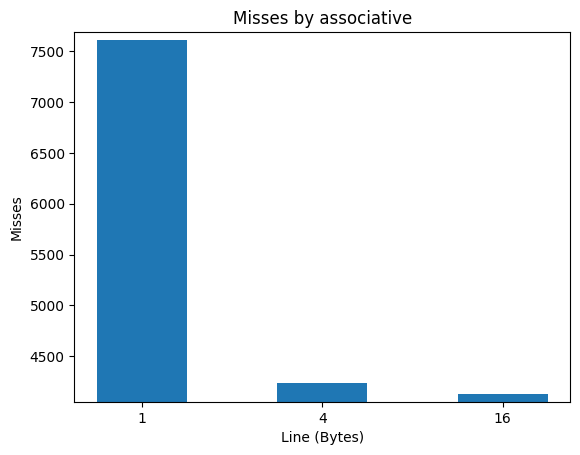

In [8]:
#@title Size=20
import matplotlib.pyplot as plt

x = ['1', '4', '16']
y = [7613, 4234, 4128]

# Espessura das barras
width = 0.5

# Plotar o gráfico de barras
plt.bar(x, y, width=width)

# Definir rótulos e título
plt.xlabel('Line (Bytes)')
plt.ylabel('Misses')
plt.title('Misses by associative')

# Definir margem para o intervalo de variação dos valores em y
margin = 0.01 * max(y)

# Definir os limites do eixo y com margem
plt.ylim(min(y) - margin, max(y) + margin)

# Exibir o gráfico
plt.show()

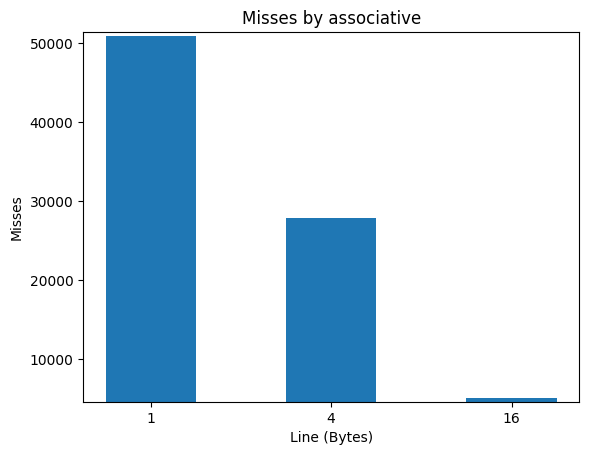

In [9]:
#@title Size=60
import matplotlib.pyplot as plt

x = ['1', '4', '16']
y = [50865, 27896, 5172]

# Espessura das barras
width = 0.5

# Plotar o gráfico de barras
plt.bar(x, y, width=width)

# Definir rótulos e título
plt.xlabel('Line (Bytes)')
plt.ylabel('Misses')
plt.title('Misses by associative')

# Definir margem para o intervalo de variação dos valores em y
margin = 0.01 * max(y)

# Definir os limites do eixo y com margem
plt.ylim(min(y) - margin, max(y) + margin)

# Exibir o gráfico
plt.show()

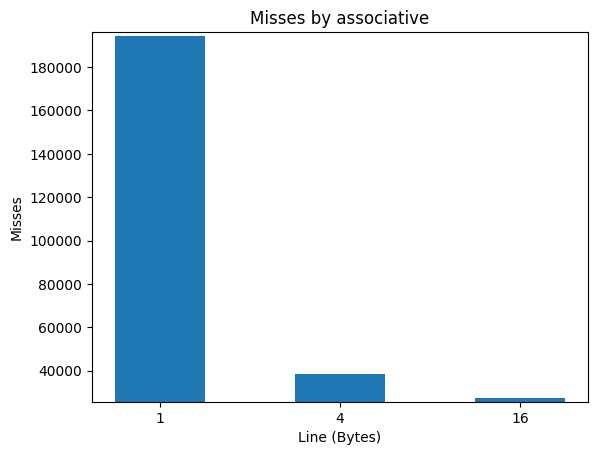

In [10]:
#@title Size=90
import matplotlib.pyplot as plt

x = ['1', '4', '16']
y = [194208, 38300, 27573]

# Espessura das barras
width = 0.5

# Plotar o gráfico de barras
plt.bar(x, y, width=width)

# Definir rótulos e título
plt.xlabel('Line (Bytes)')
plt.ylabel('Misses')
plt.title('Misses by associative')

# Definir margem para o intervalo de variação dos valores em y
margin = 0.01 * max(y)

# Definir os limites do eixo y com margem
plt.ylim(min(y) - margin, max(y) + margin)

# Exibir o gráfico
plt.show()

### Line (Bytes)

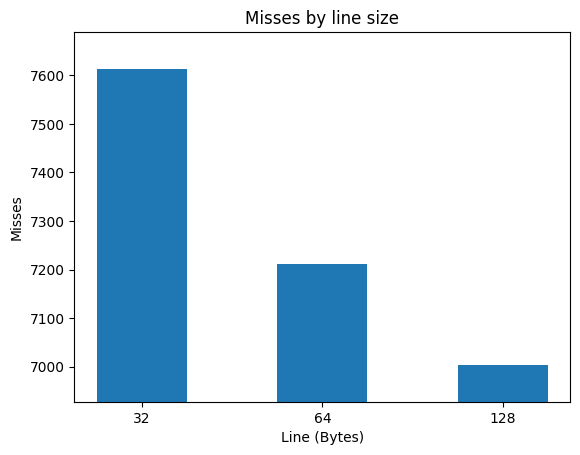

In [11]:
#@title Size=20
import matplotlib.pyplot as plt

x = ['32', '64', '128']
y = [7613, 7212, 7004]

# Espessura das barras
width = 0.5

# Plotar o gráfico de barras
plt.bar(x, y, width=width)

# Definir rótulos e título
plt.xlabel('Line (Bytes)')
plt.ylabel('Misses')
plt.title('Misses by line size')

# Definir margem para o intervalo de variação dos valores em y
margin = 0.01 * max(y)

# Definir os limites do eixo y com margem
plt.ylim(min(y) - margin, max(y) + margin)

# Exibir o gráfico
plt.show()

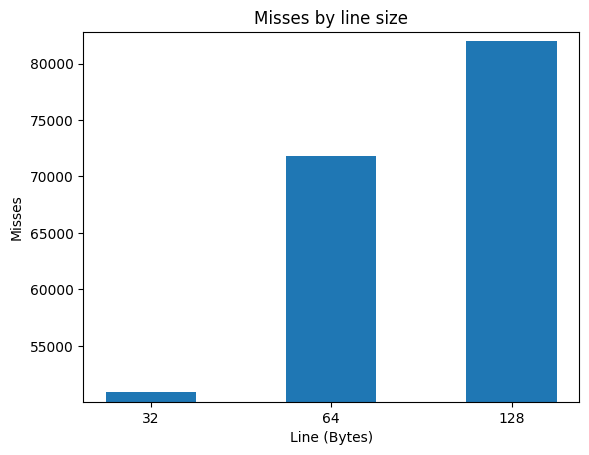

In [12]:
#@title Size=60
import matplotlib.pyplot as plt

x = ['32', '64', '128']
y = [50865, 71789, 81966]

# Espessura das barras
width = 0.5

# Plotar o gráfico de barras
plt.bar(x, y, width=width)

# Definir rótulos e título
plt.xlabel('Line (Bytes)')
plt.ylabel('Misses')
plt.title('Misses by line size')

# Definir margem para o intervalo de variação dos valores em y
margin = 0.01 * max(y)

# Definir os limites do eixo y com margem
plt.ylim(min(y) - margin, max(y) + margin)

# Exibir o gráfico
plt.show()

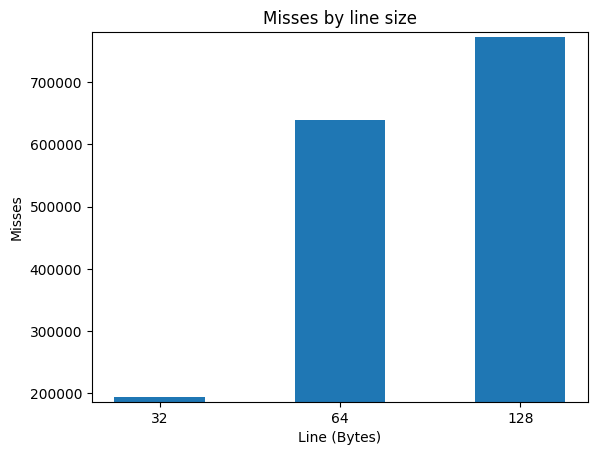

In [13]:
#@title Size=90
import matplotlib.pyplot as plt

x = ['32', '64', '128']
y = [194208, 638652, 772674]

# Espessura das barras
width = 0.5

# Plotar o gráfico de barras
plt.bar(x, y, width=width)

# Definir rótulos e título
plt.xlabel('Line (Bytes)')
plt.ylabel('Misses')
plt.title('Misses by line size')

# Definir margem para o intervalo de variação dos valores em y
margin = 0.01 * max(y)

# Definir os limites do eixo y com margem
plt.ylim(min(y) - margin, max(y) + margin)

# Exibir o gráfico
plt.show()

## Parte B

In [14]:
%%datacache
#include <stdio.h>
#include <stdlib.h>

int main(int argc, char const *argv[]) {

  int n = 90;
  char a[n][n], b[n][n], c[n][n];

  // for (int i = 0; i < n; ++i) {
  //     for (int j = 0; j < n; ++j) {
  //       a[i][j] = i + j;
  //       b[j][i] = i*2 + j;
  //       c[i][j] = 0;
  //     }
  // }

  for (int i = 0; i < n; ++i) {
      for (int j = 0; j < n; ++j) {
          for (int k = 0; k < n; ++k) {
              c[i][j] += a[i][k] * b[j][k];
          }
      }
  }

  return 0;
}

GridspecLayout(children=(Button(button_style='warning', description='Data Cache', layout=Layout(grid_area='wid…

# Associative
size=2
line=32

#### 20
associative = ['1', '4', '16'] misses = [7611, 4232, 4124]

#### 60
associative = ['1', '4', '16'] misses = [57892, 6986 , 6090]

#### 90
associative = ['1', '4', '16'] misses = [204352, 28622, 28320]

# Line
size=2 associative=1

#### 20
line = ['32', '64', '128'] misses = [7611, 7213, 7004]

#### 60
line = ['32', '64', '128'] misses = [57892, 90578, 125968]

#### 90
line = ['32', '64', '128'] misses = [204352, 309374, 470653]

### Associative

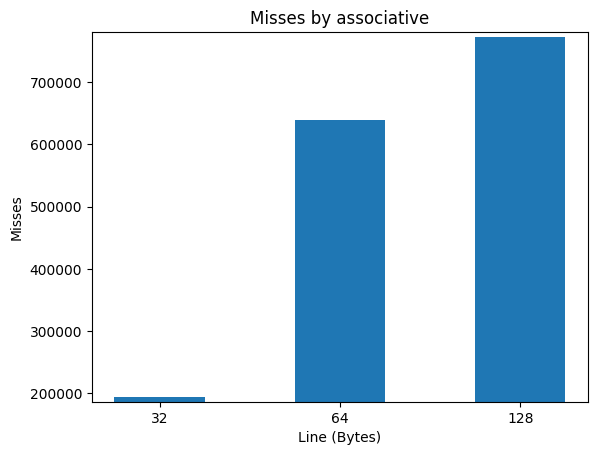

In [15]:
#@title Size=20
import matplotlib.pyplot as plt

associative = ['1', '4', '16']
misses = [7613, 4234, 4128]

# Espessura das barras
width = 0.5

# Plotar o gráfico de barras
plt.bar(x, y, width=width)

# Definir rótulos e título
plt.xlabel('Line (Bytes)')
plt.ylabel('Misses')
plt.title('Misses by associative')

# Definir margem para o intervalo de variação dos valores em y
margin = 0.01 * max(y)

# Definir os limites do eixo y com margem
plt.ylim(min(y) - margin, max(y) + margin)

# Exibir o gráfico
plt.show()

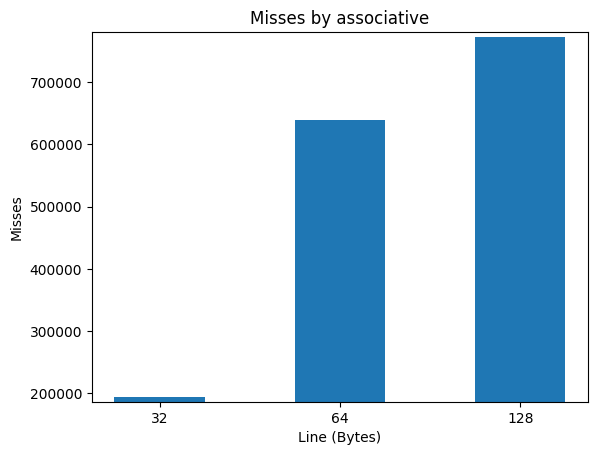

In [16]:
#@title Size=60
import matplotlib.pyplot as plt

associative = ['1', '4', '16']
misses = [45411, 5979, 5496]

# Espessura das barras
width = 0.5

# Plotar o gráfico de barras
plt.bar(x, y, width=width)

# Definir rótulos e título
plt.xlabel('Line (Bytes)')
plt.ylabel('Misses')
plt.title('Misses by associative')

# Definir margem para o intervalo de variação dos valores em y
margin = 0.01 * max(y)

# Definir os limites do eixo y com margem
plt.ylim(min(y) - margin, max(y) + margin)

# Exibir o gráfico
plt.show()

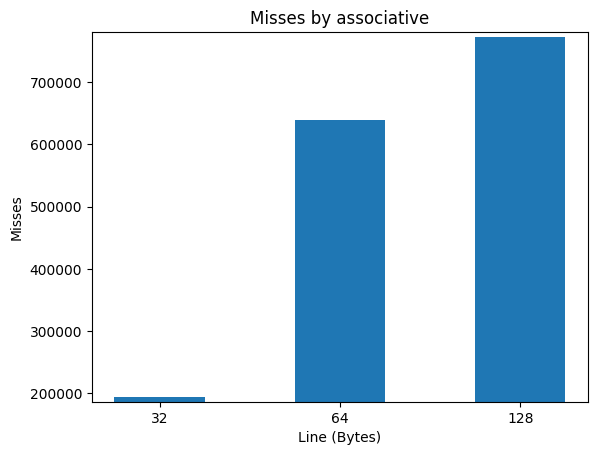

In [17]:
#@title Size=90
import matplotlib.pyplot as plt

associative = ['1', '4', '16']
misses = [164240, 27604, 27489]

# Espessura das barras
width = 0.5

# Plotar o gráfico de barras
plt.bar(x, y, width=width)

# Definir rótulos e título
plt.xlabel('Line (Bytes)')
plt.ylabel('Misses')
plt.title('Misses by associative')

# Definir margem para o intervalo de variação dos valores em y
margin = 0.01 * max(y)

# Definir os limites do eixo y com margem
plt.ylim(min(y) - margin, max(y) + margin)

# Exibir o gráfico
plt.show()

### Lines (Bytes)

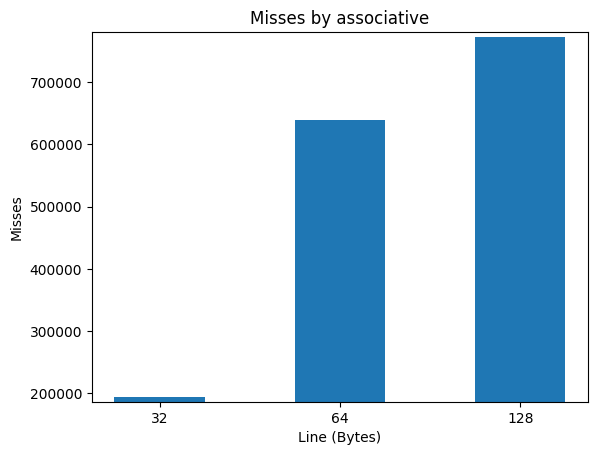

In [18]:
#@title Size=20
import matplotlib.pyplot as plt

line = ['32', '64', '128']
misses = [7613, 7212, 7004]

# Espessura das barras
width = 0.5

# Plotar o gráfico de barras
plt.bar(x, y, width=width)

# Definir rótulos e título
plt.xlabel('Line (Bytes)')
plt.ylabel('Misses')
plt.title('Misses by associative')

# Definir margem para o intervalo de variação dos valores em y
margin = 0.01 * max(y)

# Definir os limites do eixo y com margem
plt.ylim(min(y) - margin, max(y) + margin)

# Exibir o gráfico
plt.show()

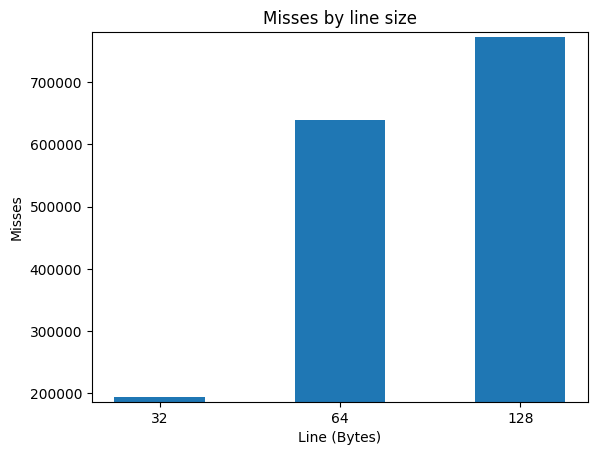

In [19]:
#@title Size=60
import matplotlib.pyplot as plt

line = ['32', '64', '128']
misses = [45411, 66577, 79244]

# Espessura das barras
width = 0.5

# Plotar o gráfico de barras
plt.bar(x, y, width=width)

# Definir rótulos e título
plt.xlabel('Line (Bytes)')
plt.ylabel('Misses')
plt.title('Misses by line size')

# Definir margem para o intervalo de variação dos valores em y
margin = 0.01 * max(y)

# Definir os limites do eixo y com margem
plt.ylim(min(y) - margin, max(y) + margin)

# Exibir o gráfico
plt.show()

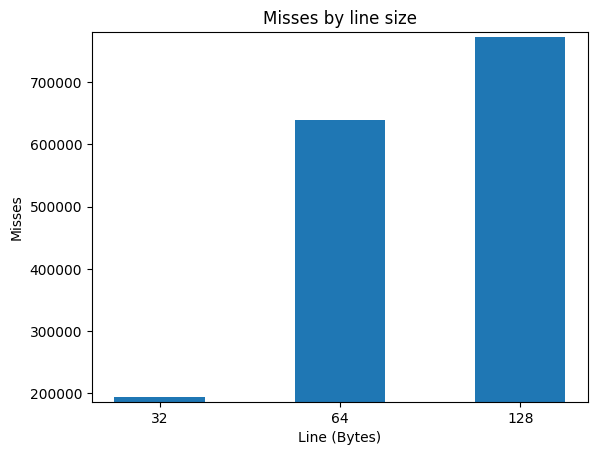

In [20]:
#@title Size=90
import matplotlib.pyplot as plt

line = ['32', '64', '128']
misses = [164240, 229631, 309684]

# Espessura das barras
width = 0.5

# Plotar o gráfico de barras
plt.bar(x, y, width=width)

# Definir rótulos e título
plt.xlabel('Line (Bytes)')
plt.ylabel('Misses')
plt.title('Misses by line size')

# Definir margem para o intervalo de variação dos valores em y
margin = 0.01 * max(y)

# Definir os limites do eixo y com margem
plt.ylim(min(y) - margin, max(y) + margin)

# Exibir o gráfico
plt.show()

## Parte C

In [21]:
%%datacache
#include <stdio.h>
#include <stdlib.h>

int main(int argc, char const *argv[]) {

  int n = 90;
  char a[n][n], b[n][n], c[n][n];
  int tilesize=8;

  // for (int i = 0; i < n; ++i) {
  //     for (int j = 0; j < n; ++j) {
  //       a[i][j] = i + j;
  //       b[i][j] = i*2 + j;
  //       c[i][j] = 0;
  //     }
  // }

  for (int ih = 0; ih < n; ih += tilesize) {                         ///\lilabel{block_loop_i}
    for (int jh = 0; jh < n; jh += tilesize) {                       ///\lilabel{block_loop_k}
      for (int kh = 0; kh < n; kh += tilesize) {                     ///\lilabel{block_loop_j}
        for (int il = 0; il < tilesize; ++il) {                      ///\lilabel{base_loop_i}
          for (int kl = 0; kl < tilesize; ++kl) {                    ///\lilabel{base_loop_k}
            for (int jl = 0; jl < tilesize; ++jl) {                  ///\lilabel{base_loop_j}
              c[ih+il][jh+jl] += a[ih+il][kh+kl] * b[kh+kl][jh+jl];  ///\lilabel{base_multiply}
        } } }
      }
    }
  }

  return 0;
}

GridspecLayout(children=(Button(button_style='warning', description='Data Cache', layout=Layout(grid_area='wid…

### Associative

size=2
line=32

#### 20
associative = ['1', '4', '16']
misses = [7612, 4233, 4125]

#### 60
associative = ['1', '4', '16']
misses = [62917, 7057, 5787]

#### 90
associative = ['1', '4', '16']
misses = [290055, 17829, 22192]

### Line

size=2
associative=1

#### 20
line = ['32', '64', '128']
misses = [7612, 7214, 7005]

#### 60
line = ['32', '64', '128']
misses = [62917, 104065, 142541]

#### 90
line = ['32', '64', '128']
misses = [290055, 491539, 708842]

### Associative

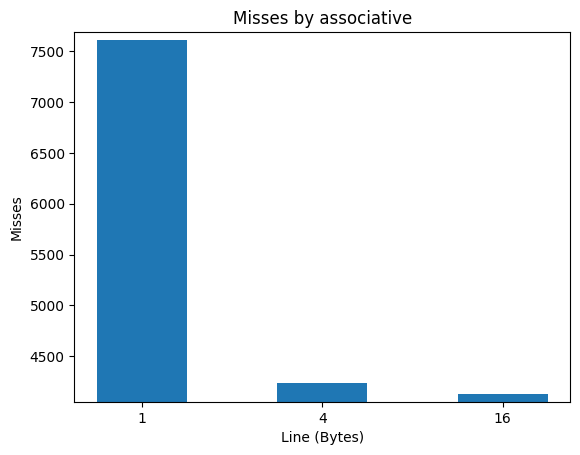

In [22]:
#@title Size=20
import matplotlib.pyplot as plt

x = ['1', '4', '16']
y = [7613, 4234, 4127]

# Espessura das barras
width = 0.5

# Plotar o gráfico de barras
plt.bar(x, y, width=width)

# Definir rótulos e título
plt.xlabel('Line (Bytes)')
plt.ylabel('Misses')
plt.title('Misses by associative')

# Definir margem para o intervalo de variação dos valores em y
margin = 0.01 * max(y)

# Definir os limites do eixo y com margem
plt.ylim(min(y) - margin, max(y) + margin)

# Exibir o gráfico
plt.show()

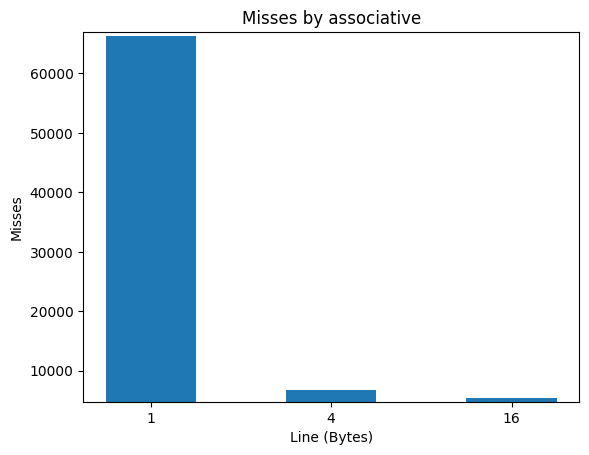

In [23]:
#@title Size=60
import matplotlib.pyplot as plt

x = ['1', '4', '16']
y = [66288, 6737, 5456]

# Espessura das barras
width = 0.5

# Plotar o gráfico de barras
plt.bar(x, y, width=width)

# Definir rótulos e título
plt.xlabel('Line (Bytes)')
plt.ylabel('Misses')
plt.title('Misses by associative')

# Definir margem para o intervalo de variação dos valores em y
margin = 0.01 * max(y)

# Definir os limites do eixo y com margem
plt.ylim(min(y) - margin, max(y) + margin)

# Exibir o gráfico
plt.show()

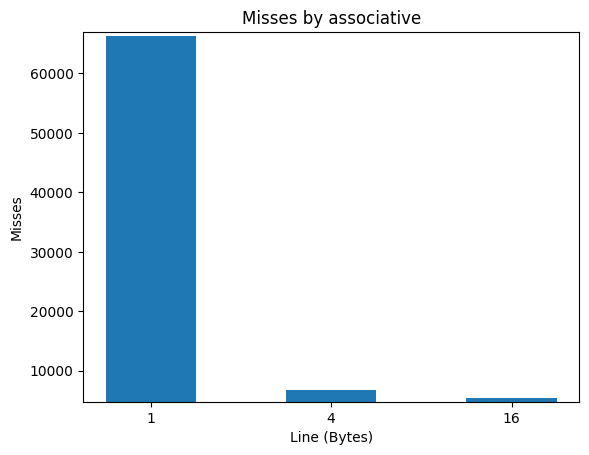

In [24]:
#@title Size=90
import matplotlib.pyplot as plt

x = ['1', '4', '16']
y = [66288, 6737, 5456]

# Espessura das barras
width = 0.5

# Plotar o gráfico de barras
plt.bar(x, y, width=width)

# Definir rótulos e título
plt.xlabel('Line (Bytes)')
plt.ylabel('Misses')
plt.title('Misses by associative')

# Definir margem para o intervalo de variação dos valores em y
margin = 0.01 * max(y)

# Definir os limites do eixo y com margem
plt.ylim(min(y) - margin, max(y) + margin)

# Exibir o gráfico
plt.show()

### Lines (Bytes)

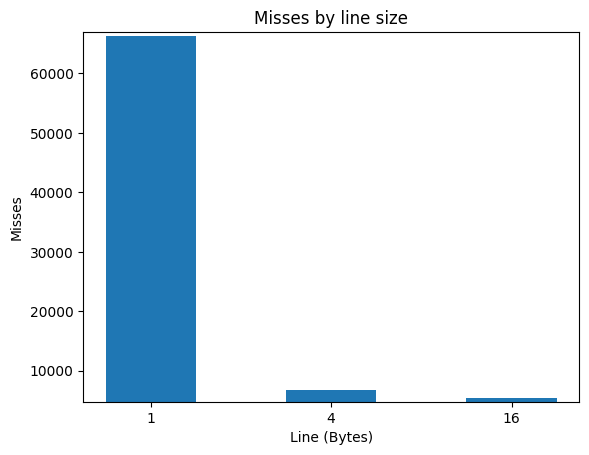

In [25]:
#@title Size=20
import matplotlib.pyplot as plt

line = ['32', '64', '128']
misses = [7163, 7212, 7004]

# Espessura das barras
width = 0.5

# Plotar o gráfico de barras
plt.bar(x, y, width=width)

# Definir rótulos e título
plt.xlabel('Line (Bytes)')
plt.ylabel('Misses')
plt.title('Misses by line size')

# Definir margem para o intervalo de variação dos valores em y
margin = 0.01 * max(y)

# Definir os limites do eixo y com margem
plt.ylim(min(y) - margin, max(y) + margin)

# Exibir o gráfico
plt.show()

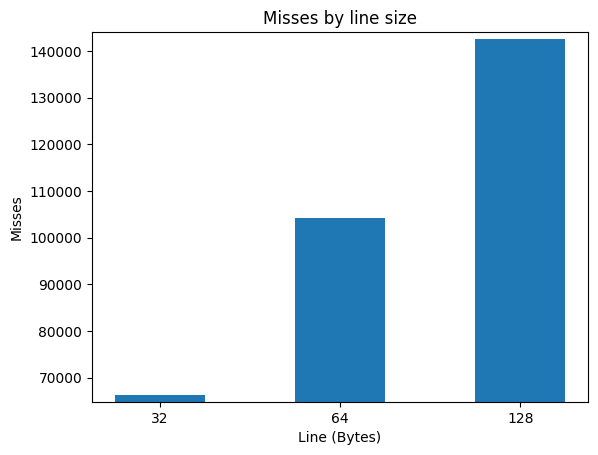

In [26]:
#@title Size=60
import matplotlib.pyplot as plt

x = ['32', '64', '128']
y = [66288, 104200, 142626]

# Espessura das barras
width = 0.5

# Plotar o gráfico de barras
plt.bar(x, y, width=width)

# Definir rótulos e título
plt.xlabel('Line (Bytes)')
plt.ylabel('Misses')
plt.title('Misses by line size')

# Definir margem para o intervalo de variação dos valores em y
margin = 0.01 * max(y)

# Definir os limites do eixo y com margem
plt.ylim(min(y) - margin, max(y) + margin)

# Exibir o gráfico
plt.show()

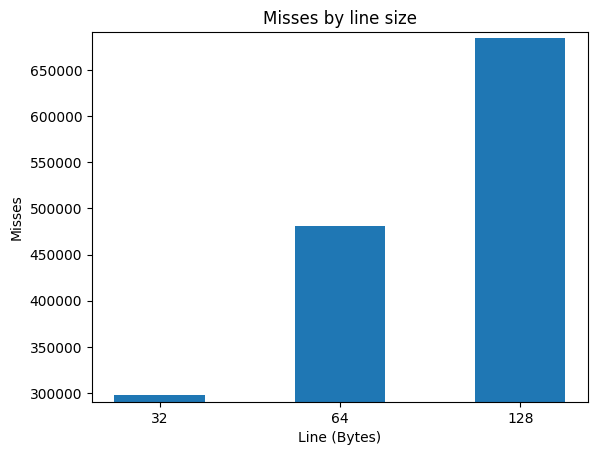

In [27]:
#@title Size=90
import matplotlib.pyplot as plt

x = ['32', '64', '128']
y = [297403, 481085, 684040]

# Espessura das barras
width = 0.5

# Plotar o gráfico de barras
plt.bar(x, y, width=width)

# Definir rótulos e título
plt.xlabel('Line (Bytes)')
plt.ylabel('Misses')
plt.title('Misses by line size')

# Definir margem para o intervalo de variação dos valores em y
margin = 0.01 * max(y)

# Definir os limites do eixo y com margem
plt.ylim(min(y) - margin, max(y) + margin)

# Exibir o gráfico
plt.show()

# Variando o tamanho da Cache e visualizando falhas e taxa de falhas

A extensão **\%\%rangecachegrind** executa várias vezes com tamanhos de cache especificados pela lista **datacache=(4,8,16,32)**, em Kbytes. O usuário especifica a associatividade (**ways**) e o tamanho do linha  (**line**), os gráficos são gerados de forma automática.

In [28]:
%%rangecachegrind datacache=(8,16,32,64,128,256); ways=2; line=64; bargraph=(misses, miss_rate)

#include <stdio.h>
#include <stdlib.h>

int main(int argc, char const *argv[]) {

  int n = 2048;
  int a[n][n], b[n][n], c[n][n];

  for (int i = 0; i < n; ++i) {
      for (int j = 0; j < n; ++j) {
        a[i][j] = i + j;
        b[i][j] = i*2 + j;
      }
  }

  int temp;
  for (int i = 0; i < n; ++i) {
      for (int j = 0; j < n; ++j) {
          temp = 0;
          for (int k = 0; k < n; ++k) {
              temp += a[i][k] * b[k][j];
          }
          c[i][j] = temp;
      }
  }
  return 0;
}

# Parte II

Executar os três códigos com rangegridcache e plotar os grafos.

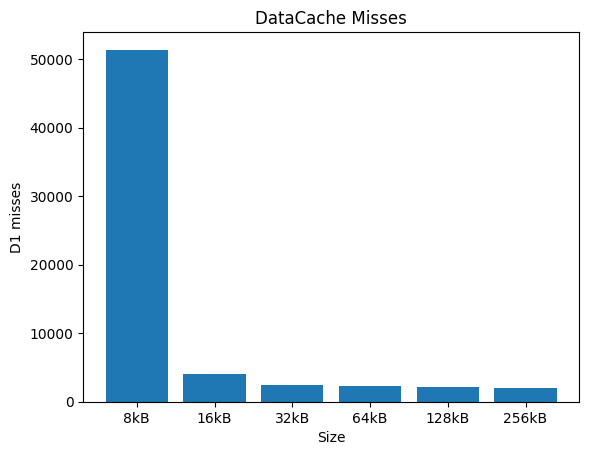

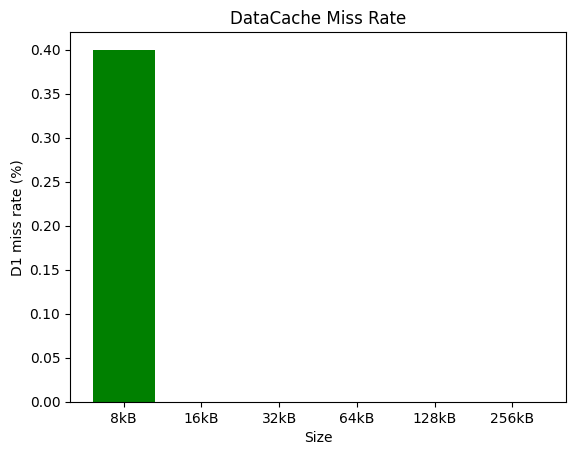

In [29]:
%%rangecachegrind datacache=(8,16,32,64,128,256); ways=2; line=64; bargraph=(misses, miss_rate)

#include <stdio.h>
#include <stdlib.h>

int main(int argc, char const *argv[]) {

  int n = 90;
  char a[n][n], b[n][n], c[n][n];

  for (int i = 0; i < n; ++i) {
        for (int j = 0; j < n; ++j) {
          a[i][j] = i + j;
          b[i][j] = i*2 + j;
          c[i][j] = 0;
        }
  }

  for (int i = 0; i < n; ++i) {
      for (int j = 0; j < n; ++j) {
          for (int k = 0; k < n; ++k) {
              c[i][j] += a[i][k] * b[k][j];
          }
      }
  }

  return 0;
}

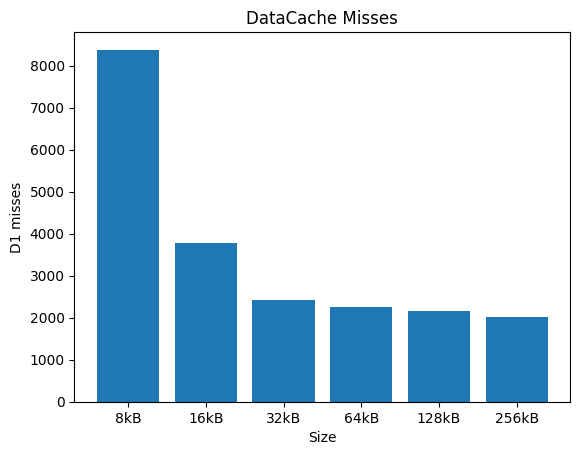

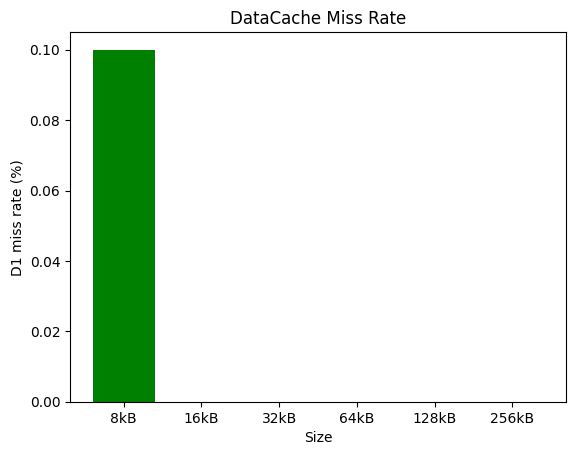

In [30]:
%%rangecachegrind datacache=(8,16,32,64,128,256); ways=2; line=64; bargraph=(misses, miss_rate)

int main(int argc, char const *argv[]) {

  int n = 90;
  char a[n][n], b[n][n], c[n][n];

  for (int i = 0; i < n; ++i) {
      for (int j = 0; j < n; ++j) {
        a[i][j] = i + j;
        b[j][i] = i*2 + j;
        c[i][j] = 0;
      }
  }

  for (int i = 0; i < n; ++i) {
      for (int j = 0; j < n; ++j) {
          for (int k = 0; k < n; ++k) {
              c[i][j] += a[i][k] * b[j][k];
          }
      }
  }

  return 0;
}

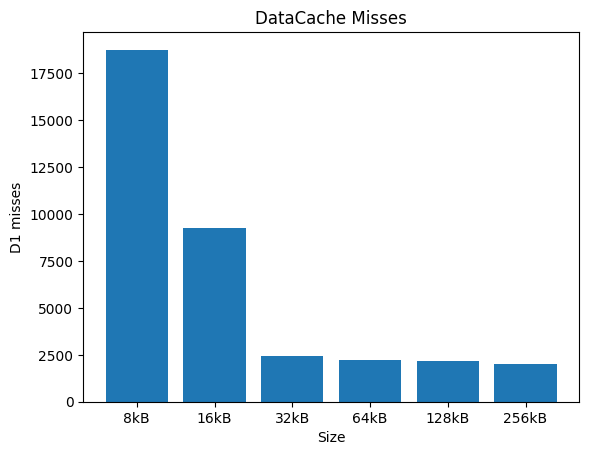

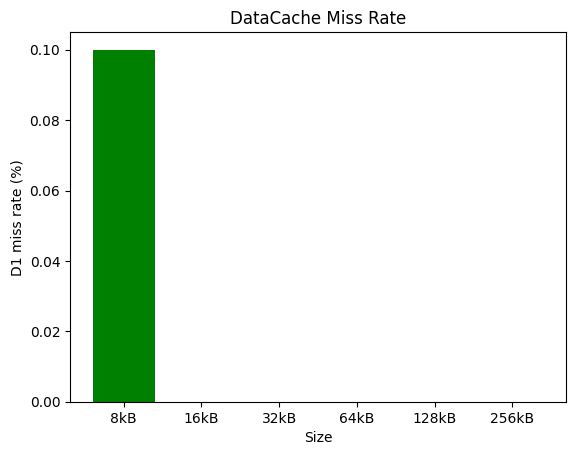

In [31]:
%%rangecachegrind datacache=(8,16,32,64,128,256); ways=2; line=64; bargraph=(misses, miss_rate)

#include <stdio.h>
#include <stdlib.h>

int main(int argc, char const *argv[]) {

  int n = 90;
  char a[n][n], b[n][n], c[n][n];
  int tilesize=8;

  for (int i = 0; i < n; ++i) {
      for (int j = 0; j < n; ++j) {
        a[i][j] = i + j;
        b[i][j] = i*2 + j;
        c[i][j] = 0;
      }
  }

  for (int ih = 0; ih < n; ih += tilesize) {                         ///\lilabel{block_loop_i}
    for (int jh = 0; jh < n; jh += tilesize) {                       ///\lilabel{block_loop_k}
      for (int kh = 0; kh < n; kh += tilesize) {                     ///\lilabel{block_loop_j}
        for (int il = 0; il < tilesize; ++il) {                      ///\lilabel{base_loop_i}
          for (int kl = 0; kl < tilesize; ++kl) {                    ///\lilabel{base_loop_k}
            for (int jl = 0; jl < tilesize; ++jl) {                  ///\lilabel{base_loop_j}
              c[ih+il][jh+jl] += a[ih+il][kh+kl] * b[kh+kl][jh+jl];  ///\lilabel{base_multiply}
        } } }
      }
    }
  }

  return 0;
}

# Parte III

[escolher 4 versões de código neste repositório](https://github.com/neboat/Moore) para compilar e executar diretamente no colab, sem usar o Valgrind. Medir o tempo com **time** do SO ou alterar o código para usar **chromos**. Fazer uma tabela das 4 implementações com matrizes de três tamanhos: N=1024, N=2048 e N=4096. A Cache L3 do processador do Colab tem 56 MB. Além da tabela fazer um gráfico dos resultados (tempo de execução para cada versão em função do tamanho).


In [32]:
!lscpu

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   46 bits physical, 48 bits virtual
CPU(s):                          2
On-line CPU(s) list:             0,1
Thread(s) per core:              2
Core(s) per socket:              1
Socket(s):                       1
NUMA node(s):                    1
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           79
Model name:                      Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:                        0
CPU MHz:                         2199.998
BogoMIPS:                        4399.99
Hypervisor vendor:               KVM
Virtualization type:             full
L1d cache:                       32 KiB
L1i cache:                       32 KiB
L2 cache:                        256 KiB
L3 cache:                        55 MiB
NUMA node0 CPU(s):               0,1
Vulnerability 

## Versão 1 (mm_c)

In [68]:
%%writefile mm_c.cpp

#include <stdlib.h>
#include <stdio.h>
#include <sys/time.h>

#ifndef n
#define n 2048
#endif
double A[n][n];
double B[n][n];
double C[n][n];

float tdiff(struct timeval *start, struct timeval *end) {
  return (end->tv_sec-start->tv_sec) + 1e-6*(end->tv_usec-start->tv_usec);
}

int main(int argc __attribute__((unused)),
         const char *argv[] __attribute__((unused))) {
  for (int i = 0; i < n; ++i) {
    for (int j = 0; j < n; ++j) {
      A[i][j] = (double)rand() / (double)RAND_MAX;
      B[i][j] = (double)rand() / (double)RAND_MAX;
      C[i][j] = 0;
    }
  }

  struct timeval start, end;
  gettimeofday(&start, NULL);

  for (int i = 0; i < n; ++i) {
    for (int j = 0; j < n; ++j) {
      for (int k = 0; k < n; ++k) {
        C[i][j] += A[i][k] * B[k][j];
      }
    }
  }

  gettimeofday(&end, NULL);
  printf("%0.6f\n", tdiff(&start, &end));
  return 0;
}

Overwriting mm_c.cpp


In [69]:
!g++ mm_c.cpp -o mm_c
!./mm_c

187.753632


### Tabela Resultados

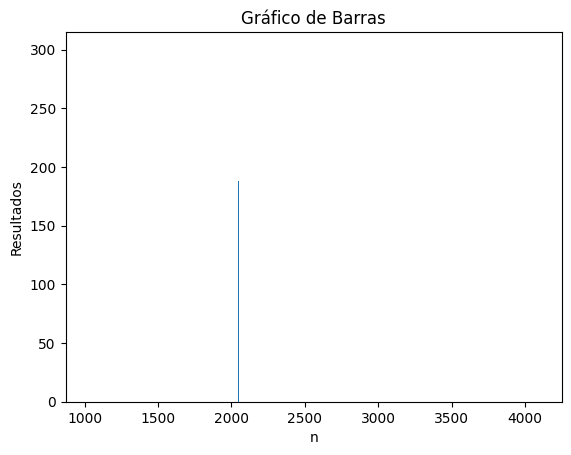

In [70]:
import matplotlib.pyplot as plt

n = [1024, 2048, 4096]
resultados = [16.539150, 187.753632, 300]

plt.bar(n, resultados)
plt.xlabel('n')
plt.ylabel('Resultados')
plt.title('Gráfico de Barras')
plt.show()

## Versão 2 (mm_c_pres)

In [42]:
%%writefile mm_c_pres.cpp

#include <stdlib.h>
#include <stdio.h>
#include <sys/time.h>

#define n 1024
double A[n][n];
double B[n][n];
double C[n][n];

float tdiff(struct timeval *start,
	    struct timeval *end) {
  return (end->tv_sec-start->tv_sec) +
    1e-6*(end->tv_usec-start->tv_usec);
}

int main(int argc,
         const char *argv[]) {
  for (int i = 0; i < n; ++i) {
    for (int j = 0; j < n; ++j) {
      A[i][j] = (double)rand() / (double)RAND_MAX;
      B[i][j] = (double)rand() / (double)RAND_MAX;
      C[i][j] = 0;
    }
  }

  struct timeval start, end;
  gettimeofday(&start, NULL);

  for (int i = 0; i < n; ++i) {
    for (int j = 0; j < n; ++j) {
      for (int k = 0; k < n; ++k) {
        C[i][j] += A[i][k] * B[k][j];
      }
    }
  }

  gettimeofday(&end, NULL);
  printf("%0.6f\n", tdiff(&start, &end));
  return 0;
}

Writing mm_c_pres.cpp


In [43]:
!g++ mm_c_pres.cpp -o mm_c_pres
!./mm_c_pres

16.200739


### Tabela Resultados

In [ ]:
import matplotlib.pyplot as plt

n = [1024, 2048, 4096]
resultados = [16.200739, 200, 300]

plt.bar(n, resultados)
plt.xlabel('n')
plt.ylabel('Resultados')
plt.title('Gráfico de Barras')
plt.show()

## Versão 3 (mm_vec)

In [60]:
%%writefile mm_vec.cpp
// Copyright 2013 Bradley C. Kuszmaul, Charles E. Leiserson, and Tao B. Schardl
#include <stdlib.h>
#include <stdio.h>
#include <sys/time.h>
#include <assert.h>

#define n 1024
double A[n][n];
double B[n][n];
double C[n][n];

float tdiff(struct timeval *start, struct timeval *end) {
  return (end->tv_sec-start->tv_sec) + 1e-6*(end->tv_usec-start->tv_usec);
}

int main(int argc, const char *argv[]) {
  for (int i = 0; i < n; ++i) {
    for (int j = 0; j < n; ++j) {
      A[i][j] = (double)rand() / (double)RAND_MAX;
      B[i][j] = (double)rand() / (double)RAND_MAX;
      C[i][j] = 0;
    }
  }

  struct timeval start, end;
  gettimeofday(&start, NULL);
///<<-------------------- Block of for's --------------------
#line 1
  for (int i = 0; i < n; ++i) {                    ///\lilabel{loop_i} \lilabel{loop_nest(}
    for (int k = 0; k < n; ++k) {                  ///\lilabel{loop_k}
      for (int j = 0; j < n; ++j) {                ///\lilabel{loop_j}
        C[i][j] += A[i][k] * B[k][j];              ///\lilabel{multiply}
      }
    }
  }                                                ///\lilabel{loop_nest)}
///>>------------------ End block of for's ------------------
  gettimeofday(&end, NULL);
  printf("%0.6f\n", tdiff(&start, &end));
  return 0;
}

Overwriting mm_vec.cpp


In [61]:
!g++ mm_vec.cpp -o mm_vec
!./mm_vec

6.195158


### Tabela Resultados

In [ ]:
import matplotlib.pyplot as plt

n = [1024, 2048, 4096]
resultados = [6.195158, 200, 300]

plt.bar(n, resultados)
plt.xlabel('n')
plt.ylabel('Resultados')
plt.title('Gráfico de Barras')
plt.show()

## Versão 4 (mm_permute)

In [63]:
%%writefile mm_permute.cpp

#include <assert.h>
#include <stdint.h>
#include <stdio.h>
#include <stdlib.h>
#include <sys/time.h>

#ifndef n
#define n 1024
#endif
double A[n][n];
double B[n][n];
double C[n][n];

float tdiff(struct timeval *start, struct timeval *end) {
  return (end->tv_sec-start->tv_sec) + 1e-6*(end->tv_usec-start->tv_usec);
}

int main(int argc __attribute__((unused)), const char *argv[] __attribute__((unused))) {
  for (int i = 0; i < n; ++i) {
    for (int j = 0; j < n; ++j) {
      A[i][j] = (double)rand() / (double)RAND_MAX;
      B[i][j] = (double)rand() / (double)RAND_MAX;
      C[i][j] = 0;
    }
  }

  struct timeval start, end;
  gettimeofday(&start, NULL);
#line 1
  for (uint64_t i = 0; i < n; ++i) {               ///\lilabel{loop_i} \lilabel{loop_nest(}
    for (uint64_t k = 0; k < n; ++k) {             ///\lilabel{loop_k}
      for (uint64_t j = 0; j < n; ++j) {           ///\lilabel{loop_j}\lilabel{loop_j(}
        C[i][j] += A[i][k] * B[k][j];              ///\lilabel{multiply}
      }                                            ///\lilabel{loop_j)}
    }
  }                                                ///\lilabel{loop_nest)}
  gettimeofday(&end, NULL);
  printf("%0.6f\n", tdiff(&start, &end));
  return 0;
}

Overwriting mm_permute.cpp


In [64]:
!g++ mm_permute.cpp -o mm_permute
!./mm_permute

5.725018


### Tabela Resultados

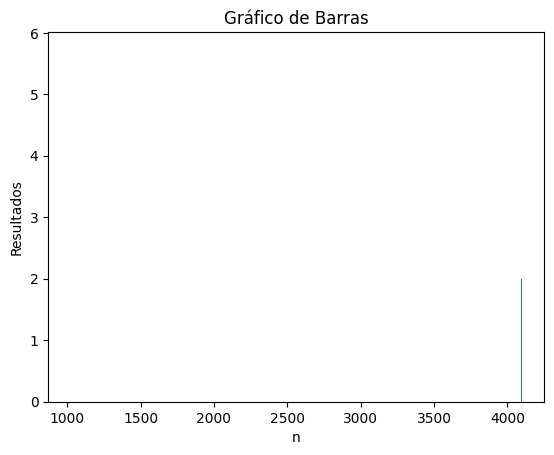

In [67]:
import matplotlib.pyplot as plt

n = [1024, 2048, 4096]
resultados = [5.725018, 1, 2]

plt.bar(n, resultados)
plt.xlabel('n')
plt.ylabel('Resultados')
plt.title('Gráfico de Barras')
plt.show()

# Questão 1 da Prova 3

Abaixo sugestões de exercicios para a questão 1 da prova 3

## Suponha uma cache com bloco de 4 bytes e 16 posições mapeamento direto.

Para o código abaixo, após 20 acessos a memória (pode ser de A, B ou C...) Qual será o conteúdo da cache. Suponha que **temp, i, j, k** sejam registradores ? Quantas falhas terão ? Suponha que a cache esteja vazia na execução do trecho.

```
  byte a[4][4], b[4][4], c[4][4];

  int temp;
  for (int i = 0; i < 4; ++i) {
      for (int j = 0; j < 4; ++j) {
          temp = 0;
          for (int k = 0; k < 4; ++k) {
              temp += a[i][k] * b[k][j];
          }
          c[i][j] = temp;
      }
  }
```

## Outras  opções para questão anterior:

* Cache de 32 ou 64, o que modifica ?
* Bloco de 8 ?
* 2-way ?
* suponha que o acesso para matriz B seja por linha (a matriz foi transposta na memória antes de executar o código).



# Pontos Extras

* Fazer a analise para cache com 16 e 32 para a versão com Tile, considerando 2x2 para a execução dos 30 primeiros acessos. (2 pontos)
* Fazer um simulador que gere os a contagem do acesso para uma cache de mapeamento direto onde o tamanho da cache, do bloco, da matriz e do tile são parametros (5 pontos).

# Análise da versão Tile (20 × 20)

## Cache de 16 [elementos]

Bloco = 4 [elementos]
* Hit em A = 3
* Hit em B = 6
* Hit em C = 5

## Cache de 32 [elementos]
Bloco = 4 [elementos]
* Hit em A = 5
* Hit em B = 10
* Hit em C = 5

# Simulador de Cache

In [33]:
%%writefile cache.cpp
#include <stdio.h>
#include <stdlib.h>
#include <vector>
#include <map>

class Cache {
	private:
		int cache_b;
		int line_b;
		int block_b;

		int cache_s;
		int line_s;
		int block_s;

		std::vector<std::vector<int>> cache;

		char *under;

		int getBase(const int mem) const {
									// e.g. => mem  = 001100|100|01
			int mask = 1 << block_b; 			// e.g. => mask = 000000|001|00
			mask -= 1;					// e.g. => mask = 000000|000|11
			mask = ~mask;					// e.g. => mask = 111111|111|00
			return (mem & mask);				// e.g. => base = 001100|100|00
		}

		int getBlock(const int mem) const {
									// e.g. => mem  = 001100|100|01
			int mask = ~1;					// e.g. => mask = 111111|111|11
			mask = mask << block_b;			// e.g. => mask = 111111|111|00
			mask = ~mask;					// e.g. => mask = 000000|000|11
			return (mem & mask);				// e.g. => blk  = 000000|000|01
		}

		int getLine(const int mem) const {
									// e.g. => mem  = 001100|100|00
			int mask = ~0;					// e.g. => mask = 111111|111|11
			mask = mask << (line_b + block_b);		// e.g. => mask = 111111|000|00
			mask = ~mask;					// e.g. => mask = 000000|111|11
			int line = mem & mask;				// e.g. => line = 000000|100|00
			return line >> block_b;			// e.g. => line = 000000|001|00
		}

	public:
		Cache(const int cache_b, const int line_b, const int block_b): cache_b(cache_b), line_b(line_b), block_b(block_b) {
			cache_s = 1 << cache_b;
			line_s = 1 << line_b;
			block_s = 1 << block_b;

			cache = std::vector<std::vector<int>>(line_s, std::vector<int>(block_s, -1));

			under = new char[(block_s * 5)/2];
			for (int i = 0; i < (block_s * 5)/2; i++)
				under[i] = '=';
		}

		bool read(const int mem) {
			int line = getLine(mem);
			int block = getBlock(mem);

			bool hit = false;

			if (cache[line][block] == mem) hit = true;
			else {
				int base = getBase(mem);
				for (int b = 0; b < block_s; b++)
					cache[line][b] = base + b;
			}

			return hit;
		}

		void print() {
			printf("%s", under);
			printf("CACHE");
			printf("%s\n", under);
			for (const auto &line : cache) {
				for (const auto &elem : line)
					printf("%*d", 5, elem);
				printf("\n");
			}
			printf("%s", under);
			printf("=====");
			printf("%s\n", under);
		}
};

class Memory {
	private:
		int size;
		int used;
		std::map<char, int> tables;

		bool verbose;
	public:
		Memory(const int size, const bool verbose = false): size(size), used(0), verbose(verbose) {}

		void add(const char name) {
			used += size*size;
			tables[name] = tables.size();
		}

		int toMem(const char name, const int x, const int y) const {
			int mem = tables.at(name)*size*size + size*x + y;
			if (verbose) printf("read %c in [%d][%d] => %d\n", name, x, y, mem);
			return mem;
		}
};

int main(int argc, char const *argv[]) {

  const int n = 20;
  const int tilesize = 2;

  const int CACHE_B = 5;
  const int BLOCK_B = 2;
  const int LINE_B = CACHE_B - BLOCK_B;

  char a[n][n], b[n][n], c[n][n];

  // Inicializando matrizes
  for (int i = 0; i < n; ++i) {
      for (int j = 0; j < n; ++j) {
        a[i][j] = i + j;
        b[i][j] = i*2 + j;
        c[i][j] = 0;
      }
  }

  // Inicializando matrizes na memória
  Memory memo(n, true);
  memo.add('a');
  memo.add('b');
  memo.add('c');

  /*
  printf("TESTE\n");
  printf("%s\n", (memo.toMem('a', 0, 0) == 0)?("true"):("false"));
  printf("%s\n", (memo.toMem('b', 0, 0) == 400)?("true"):("false"));
  printf("\n");
  */

  // Iniciliazando cache
  Cache cache(CACHE_B, LINE_B, BLOCK_B);

  int cont_a = 0, cont_b = 0, cont_c = 0;
  int cont = 30;

  for (int ih = 0; ih < n; ih += tilesize) {                         ///\lilabel{block_loop_i}
    for (int jh = 0; jh < n; jh += tilesize) {                       ///\lilabel{block_loop_k}
      for (int kh = 0; kh < n; kh += tilesize) {                     ///\lilabel{block_loop_j}
        for (int il = 0; il < tilesize; ++il) {                      ///\lilabel{base_loop_i}
          for (int kl = 0; kl < tilesize; ++kl) {                    ///\lilabel{base_loop_k}
            for (int jl = 0; jl < tilesize; ++jl) {                  ///\lilabel{base_loop_j}
              c[ih+il][jh+jl] += a[ih+il][kh+kl] * b[kh+kl][jh+jl];  ///\lilabel{base_multiply}

              if (cont > 0) {
              	cache.print();
              	if (cache.read(memo.toMem('a', ih+il, kh+kl))) cont_a++;
              	if (cache.read(memo.toMem('b', kh+kl, jh+jl))) cont_b++;
              	if (cache.read(memo.toMem('c', ih+il, jh+jl))) cont_c++;
              	cont--;
              }
        } } }
      }
    }
  }

  //cache.print();

  printf("\nHIT A = %d\nHIT B = %d\nHIT C = %d\n", cont_a, cont_b, cont_c);

  return 0;
}

Writing cache.cpp


In [34]:
!g++ cache.cpp -o cache
!./cache

==========CACHE==========
   -1   -1   -1   -1
   -1   -1   -1   -1
   -1   -1   -1   -1
   -1   -1   -1   -1
   -1   -1   -1   -1
   -1   -1   -1   -1
   -1   -1   -1   -1
   -1   -1   -1   -1
read a in [0][0] => 0
read b in [0][0] => 400
read c in [0][0] => 800
==========CACHE==========
  800  801  802  803
   -1   -1   -1   -1
   -1   -1   -1   -1
   -1   -1   -1   -1
  400  401  402  403
   -1   -1   -1   -1
   -1   -1   -1   -1
   -1   -1   -1   -1
read a in [0][0] => 0
read b in [0][1] => 401
read c in [0][1] => 801
==========CACHE==========
  800  801  802  803
   -1   -1   -1   -1
   -1   -1   -1   -1
   -1   -1   -1   -1
  400  401  402  403
   -1   -1   -1   -1
   -1   -1   -1   -1
   -1   -1   -1   -1
read a in [0][1] => 1
read b in [1][0] => 420
read c in [0][0] => 800
==========CACHE==========
  800  801  802  803
  420  421  422  423
   -1   -1   -1   -1
   -1   -1   -1   -1
  400  401  402  403
   -1   -1   -1   -1
   -1   -1   -1   -1
   -1   -1   -1   -1
read a in [0][